Writte by Wenhan Gao, Ph.D. student at Stony Brook University.

https://wenhangao21.github.io/

If you have any questions, feel free to reach out.


# Decomposing Tensors, Equivariance, and Irreducibility

## Mathematical Formula: Change of Basis

To decompose a rank-2 Catersian tensor (i.e. the tensor product of two $l_2$ spherical tensors) into $l_0, l_1, l_2$ spherical tensors:

$$
\begin{aligned}
{T}^{[2]}=&\left[\begin{array}{lll}
T_{x x} & T_{x y} & T_{x z} \\
T_{y x} & T_{y y} & T_{y z} \\
T_{z x} & T_{z y} & T_{z z}
\end{array}\right] &\\
%%%% Second Equality %%%%
=&~\color{red}{\frac{\sqrt{3}}{3} \left(T_{x x}+T_{y y}+T_{z z}\right)\left[\begin{array}{lll}
1 & & \\
& 1 & \\
& & 1
\end{array}\right]}& \color{red}{\text{($l=0$)}} \\
&
+\color{blue}{\left[\begin{array}{ccc}
& \frac{T_{x y}-T_{y x}}{2} & \frac{T_{x z}-T_{z x}}{2} \\
\frac{T_{yx}-T_{xy}}{2} & &\frac{T_{y z} - T_{z y} }{2} \\
\frac{T_{zx}-T_{xz}}{2} & \frac{T_{zy}-T_{yz}}{2} &
\end{array}\right]} & \color{blue}{\text{($l=1$)}}\\
& +\color{green}{\left[\begin{array}{ccc}
T_{x x} & \frac{T_{xy}+T_{yx}}{2} & \frac{T_{x z}+T_{z x}}{2} \\
\frac{T_{yx}+T_{xy}}{2} & T_{y y} & \frac{T_{y z} +T_{zy} }{2} \\
\frac{T_{z x}+T_{xz}}{2} & \frac{T_{zy}+T_{yz}}{2} & T_{z z}
\end{array}\right]-\frac{\sqrt{3}}{3} \left(T_{x x}+T_{y y}+T_{z z}\right)\left[\begin{array}{lll}
1 & & \\
& 1 & \\
& & 1
\end{array}\right]} & \color{green}{\text{($l=2$)}}\\
%%%% Third Equality%%%%
=&~\color{red}{\overbrace{\frac{\sqrt{3}}{3} \left(T_{x x}+T_{y y}+T_{z z}\right)}^{\lambda_1}\left[\begin{array}{lll}
1 & & \\
& 1 & \\
& & 1
\end{array}\right]} & \color{red}{\text{($l=0$)}}\\
%% lambda 2
&+\color{blue}{ \overbrace{\frac{\sqrt{2}}{2}\left(T_{y z}-T_{z y}\right)}^{\lambda_2}\left[\begin{array}{lll}
& & \\
& &\frac{\sqrt{2}}{2} \\
&-\frac{\sqrt{2}}{2}&
\end{array}\right]
%% lambda 3
+\overbrace{\frac{\sqrt{2}}{2}\left(T_{zx}-T_{xz}\right)}^{\lambda_3}\left[\begin{array}{lll}
 & &-\frac{\sqrt{2}}{2}\\
&  & \\
\frac{\sqrt{2}}{2}& &
\end{array}\right]
%% lambda 4
+\overbrace{\frac{\sqrt{2}}{2}\left(T_{xy}-T_{yx}\right)}^{\lambda_4}\left[\begin{array}{lll}
 &\frac{\sqrt{2}}{2} & \\
-\frac{\sqrt{2}}{2}&  & \\
& &
\end{array}\right]}  & \color{blue}{\text{($l=1$)}}\\
&
%% lambda 5
+\color{green}{\overbrace{\frac{\sqrt{2}}{2}\left(T_{xz}+T_{xz}\right)}^{\lambda_5}\left[\begin{array}{lll}
 & &\frac{\sqrt{2}}{2}\\
&  & \\
\frac{\sqrt{2}}{2}& &
\end{array}\right]
%% lambda 6
+\overbrace{\frac{\sqrt{2}}{2}\left(T_{xy}+T_{yx}\right)}^{\lambda_6}\left[\begin{array}{lll}
 &\frac{\sqrt{2}}{2} & \\
\frac{\sqrt{2}}{2}&  & \\
& &
\end{array}\right]  
%% lambda 7
+\overbrace{\frac{\sqrt{6}}{6}\left(2\cdot T_{yy}-T_{xx} -T_{zz}\right)}^{\lambda_7}\left[\begin{array}{lll}
-\frac{\sqrt{2}}{2} & & \\
& \sqrt{2} & \\
& & -\frac{\sqrt{2}}{2}
\end{array}\right]}
&\\
&
%% lambda 8
\color{green}{+\overbrace{\frac{\sqrt{2}}{2}\left(T_{y z}+T_{z y}\right)}^{\lambda_8}\left[\begin{array}{lll}
& & \\
& &\frac{\sqrt{2}}{2} \\
&\frac{\sqrt{2}}{2}&
\end{array}\right]
%% lambda 9
+\overbrace{\frac{\sqrt{2}}{2}\left(T_{zz}-T_{xx}\right)}^{\lambda_9}\left[\begin{array}{lll}
-\frac{\sqrt{6}}{2}& & \\
& & \\
&& \frac{\sqrt{6}}{2}
\end{array}\right]}& \color{green}{\text{($l=2$)}}
\end{aligned}
$$

Moreover, we can also decompose higher-ranked Catersian tensors into spherical tensors although it is more complicated.

Note:

- The decomposition of a tensor product into irreducible representations (irreps) is unique, but how you express it in terms of the basis of the resulting irreps may not be.
- Within an irrep, there are generally many equivalent ways to choose a basis. This is because unitary transformations within the irrep subspace do not change the representation's structure but may alter the explicit form of the basis vectors.

## Implementation

### 0. Initialize

In [ ]:
# uncomment to install e3nn
! pip install e3nn

In [ ]:
import torch
from e3nn import o3
import numpy as np
import sympy as sp
from sympy import sqrt, latex, symbols
from IPython.display import display, Math
from matplotlib import pyplot as plt
torch.manual_seed(111)
np.random.seed(111)
torch.set_printoptions(precision=4)
np.set_printoptions(precision=4, suppress=True)
# Initialize two random vectors (can be viewed as $l1$ tensors)
irreps_x = o3.Irreps('1e')
irreps_y = o3.Irreps('1e')
x = irreps_x.randn(-1)
y = irreps_y.randn(-1)

### 1. Get the spherical tensor product by e3nn and the Catersian tensor by outer product.

In [ ]:
tp = o3.FullTensorProduct(irreps_x, irreps_y)
result = tp(x,y)
display(Math("\\text{Spherical tensors from } x \otimes_{cg} y" + latex(sp.Matrix(result).T.evalf(4))))
outer_product = torch.outer(x, y)

<IPython.core.display.Math object>

### 2. Decomposition

In [ ]:
def decompose_tensor(T):
    if outer_product.shape != (3, 3):
        raise ValueError("Input must be a rank-2 tensor.")
    # l-0: Trace of the tensor
    l0 = np.trace(T) / np.sqrt(3)

    # l-1: Antisymmetric part
    antisymmetric_part = (T.T - T )/np.sqrt(2)
    l1 = np.array([
        antisymmetric_part[2, 1],  # T_yz - T_zy
        antisymmetric_part[0, 2],  # T_zx - T_xz
        antisymmetric_part[1, 0],  # T_xy - T_yx
    ])
    # l-2： Symmetric part
    symmetric_part = (T + T.T) /2
    matrix = symmetric_part.numpy()
    M_xx, M_yy, M_zz = matrix[0, 0], matrix[1, 1], matrix[2, 2]
    M_xy, M_xz, M_yz = matrix[0, 1], matrix[0, 2], matrix[1, 2]

    T_2m2 = M_xy* np.sqrt(2)                    # T_xy + T_yx
    T_2m1 = M_xz* np.sqrt(2)                    # T_xz + T_zx
    T_20 = (-M_zz - M_xx + 2* M_yy)/np.sqrt(6)  # 2T_yy - T_xx - T_zz
    T_21 = M_yz* np.sqrt(2)                     # T_yz + T_zy
    T_22 = (-M_xx + M_zz)/ np.sqrt(2)           # T_zz - T_xx
    l2 = np.array([T_2m1, T_2m2, T_20, T_21, T_22])
    return l0, l1, l2

l0, l1, l2 = decompose_tensor(outer_product)
display(Math("l_0" + latex(sp.N(l0).evalf(4))))
display(Math("l_1" + latex(sp.Matrix(l1).T.evalf(4))))
display(Math("l_2" + latex(sp.Matrix(l2).T.evalf(4))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### 3. Verify with the E3NN Library (Visualize the CG Change of Basis Process)

In [ ]:
l1, l2 = 1, 1
for l3 in range(3):
    C = o3.wigner_3j(l1, l2, l3)  # Compute the Wigner 3j-symbols, input order l1, l2, output order l3
    display(Math(f"\\text{{Clebsch-Gordan coefficient matrices for }} l_{{{l3}}}"))
    # Offset the scaling factors in the implementation in e3nn.o3
    if l3 == 1:
        C = np.sqrt(3) * C
    elif l3 == 2:
        C = np.sqrt(5) * C
    spherical_tensor = torch.Tensor([])
    # Process CG coefficients for each element
    for j in range(C.shape[-1]):
        coeff = C[..., j]
        CG_result = torch.einsum('ij,ij->', outer_product, coeff)
        print()
        sp.pprint(sp.Matrix(coeff.numpy()).evalf(4), use_unicode=True)
        print()
        spherical_tensor = torch.cat((spherical_tensor, CG_result.unsqueeze(-1)), dim=0)
    display(Math(f"{latex(symbols(f'l_{l3}'))} \\text{{ Spherical Tensor: }} {latex(sp.Matrix(spherical_tensor.numpy()).T.evalf(4))}"))
    print()

<IPython.core.display.Math object>


⎡0.5773    0       0   ⎤
⎢                      ⎥
⎢  0     0.5773    0   ⎥
⎢                      ⎥
⎣  0       0     0.5773⎦



<IPython.core.display.Math object>

<IPython.core.display.Math object>


⎡0     0       0   ⎤
⎢                  ⎥
⎢0     0     0.7071⎥
⎢                  ⎥
⎣0  -0.7071    0   ⎦


⎡  0     0  -0.7071⎤
⎢                  ⎥
⎢  0     0     0   ⎥
⎢                  ⎥
⎣0.7071  0     0   ⎦


⎡   0     0.7071  0⎤
⎢                  ⎥
⎢-0.7071    0     0⎥
⎢                  ⎥
⎣   0       0     0⎦



<IPython.core.display.Math object>

<IPython.core.display.Math object>


⎡  0     0  0.7071⎤
⎢                 ⎥
⎢  0     0    0   ⎥
⎢                 ⎥
⎣0.7071  0    0   ⎦


⎡  0     0.7071  0⎤
⎢                 ⎥
⎢0.7071    0     0⎥
⎢                 ⎥
⎣  0       0     0⎦


⎡-0.4082    0        0   ⎤
⎢                        ⎥
⎢   0     0.8165     0   ⎥
⎢                        ⎥
⎣   0       0     -0.4082⎦


⎡0    0       0   ⎤
⎢                 ⎥
⎢0    0     0.7071⎥
⎢                 ⎥
⎣0  0.7071    0   ⎦


⎡-0.7071  0    0   ⎤
⎢                  ⎥
⎢   0     0    0   ⎥
⎢                  ⎥
⎣   0     0  0.7071⎦



<IPython.core.display.Math object>

Just FYI, those numbers in the CG matrices represent

In [ ]:
expressions = [sqrt(3)/3, sqrt(2)/2, sqrt(6)/6]
# expressions = [sqrt(3)/3, sqrt(2)/2, sqrt(6)/6, sqrt(30)/30, sqrt(30)/15, sqrt(10)/10]
for expr in expressions:
    display(Math(f"{latex(expr)} \\approx {expr.evalf()}"))
    print()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### 4. Equivariance and Irreducibility

In [ ]:
# First get a random rotation matrix
R = o3.rand_matrix()

Let's first check the equivariance and irreducibility of Catersian tensors:
$$Rx \otimes Ry = R_2(x \otimes y),$$
where $R_2 \in \mathbb{R}^{3\times 3\times 3\times3} = R \otimes R$ is the representation of the rotation represented by $R$ acting on rank-2 Catersian tensors. Here we losely abuse the notation $\otimes$ to denote $(A \otimes B)_{i j, k l}=a_{i j} \cdot b_{k l}$, it is more formally known as the Kronecker product.

In [ ]:
# Rotate x,y
x_rot = torch.einsum('ij,j', R, x)
y_rot = torch.einsum('ij,j', R, y)
# Get the tensor product of Rx Ry, tp(Rx,Ry)
outer_product_rot = torch.outer(x_rot, y_rot)
# Get the representation of R on rank-2 Catersian Tensors
R_rank2 = torch.einsum('ij,kl', R, R)
# Apply the action to tp(x,y)
R_outer_product = torch.einsum('ijkl,jl', R_rank2, outer_product)
# tp(Rx,Ry) = R(tp(x,y))
display(Math("Rx\otimes Ry:" + latex(sp.Matrix(outer_product_rot).applyfunc(lambda x: round(x, 4)))))
print()
display(Math("R_2 (x\otimes y):" +latex(sp.Matrix(R_outer_product).applyfunc(lambda x: round(x, 4)))))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Indeed, Catersian tensor product is equivariant. However, the representation of $R$ on rank-2 Catersian tensors is not irreducible (block-diagonal).

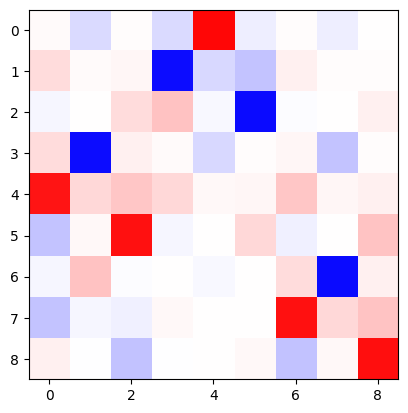

In [ ]:
plt.imshow(torch.kron(R, R), cmap='bwr', vmin=-1, vmax=1);

For spherical tensors:
$${T}^{(l)} \rightarrow \mathcal{D}^{(l)}(R) {T}^{(l)},$$
where ${T}^{(l)} \in \mathbb{R}^{(2 \ell+1)}$ and $D^{\ell}(R) \in \mathbb{R}^{(2 \ell+1) \times(2 \ell+1)}$ is the order-$l$ Wigner-D matrix with respect to a rotation $R$.

In [ ]:
# Get the spherical tensor product of x y, tpcg(x,y)
s_tensors = tp(x,y)
display(Math("\\text{{ Spherical tensors from }} x \otimes_{cg} y: " + latex(sp.Matrix(s_tensors).T.evalf(4))))

<IPython.core.display.Math object>

In [ ]:
# Get the spherical tensor product of Rx Ry, tpcg(Rx,Ry)
s_tensors_rot = tp(x_rot,y_rot)
display(Math("\\text{{ Spherical tensors from }} Rx \otimes_{cg} Ry: " + latex(sp.Matrix(s_tensors_rot).T.evalf(4))))

<IPython.core.display.Math object>

In [ ]:
# Get the Wigner-D matrix, i.e. representation of R on spherical tensors
D = tp.irreps_out.D_from_matrix(R)
# Apply the representation D on tpcg(x,y)
R_s_tensors = D@s_tensors
display(Math("\\text{{ Spherical tensors from }} \mathcal{D}(x \otimes_{cg} y): " + latex(sp.Matrix(R_s_tensors).T.evalf(4))))

<IPython.core.display.Math object>

Indeed, spherical tensor product is equivariant. The representation $\mathcal{D}$ is irreducible (block-diagonal) now.

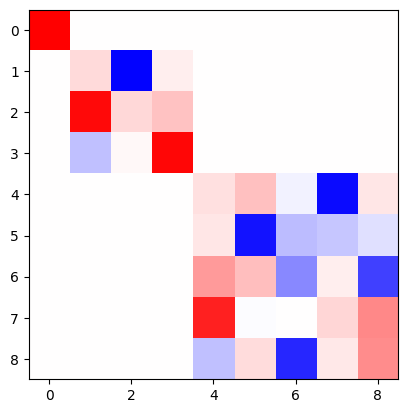

In [ ]:
plt.imshow(D, cmap='bwr', vmin=-1, vmax=1);

$l_0$ tensors are invariant, so the representation is just the identity.

In [ ]:
display(Math(latex(symbols('\\mathcal{D}^{(0)}')) + " \\text{: } " + latex(sp.N(D[0, 0]))))

<IPython.core.display.Math object>

$l_1$ tensors transform like vectors, so the representation is the same as the $O(3)$ rotation matrix $R$.

In [ ]:
display(Math(latex(symbols('\\mathcal{D}^{(1)}')) + " \\text{: } " + latex(sp.Matrix(D[1:4, 1:4]).applyfunc(lambda x: round(x, 4)))))
print()
display(Math(latex(symbols('R')) + " \\text{: } " + latex(sp.Matrix(R).applyfunc(lambda x: round(x, 4)))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### 5. Others

Get Wigner-D matrices from Euler angles

In [ ]:
### Get the Order-l Wigner-D matrix by specifying Euler angles.
l =1
alpha = torch.tensor(3)  # Rotation around Y-axis (third)
beta = torch.tensor(2)   # Rotation around X-axis (second)
gamma = torch.tensor(1)  # Rotation around Y-axis (first)

# Compute Wigner-D matrix, YXY convention for rotations
D = o3.wigner_D(l, alpha, beta, gamma)
print(D)

### Can verify with own implementation for l=1
def get_R3_rotation_matrix(alpha, beta, gamma):
    Ry_gamma = torch.tensor([
        [torch.cos(gamma), 0, torch.sin(gamma)],
        [0, 1, 0],
        [-torch.sin(gamma), 0, torch.cos(gamma)]
    ], dtype=torch.float32)
    Rx_beta = torch.tensor([
        [1, 0, 0],
        [0, torch.cos(beta), -torch.sin(beta)],
        [0, torch.sin(beta), torch.cos(beta)]
    ], dtype=torch.float32)
    Ry_alpha = torch.tensor([
        [torch.cos(alpha), 0, torch.sin(alpha)],
        [0, 1, 0],
        [-torch.sin(alpha), 0, torch.cos(alpha)]
    ], dtype=torch.float32)
    R = torch.mm(Ry_alpha, torch.mm(Rx_beta, Ry_gamma))

    return R

rotation_matrix = get_R3_rotation_matrix(alpha, beta, gamma)
print(rotation_matrix)

tensor([[-0.4855,  0.1283, -0.8648],
        [ 0.7651, -0.4161, -0.4913],
        [-0.4229, -0.9002,  0.1038]])
tensor([[-0.4855,  0.1283, -0.8648],
        [ 0.7651, -0.4161, -0.4913],
        [-0.4229, -0.9002,  0.1038]])
